In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import simplefilter

simplefilter('ignore')

In [2]:
#Подгружаем DataSet
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', encoding='latin-1')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.shape

(1599, 12)

In [7]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#Очистка нулевых строк
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Строк с нулевыми значениями не найдено

In [11]:
#Убираем ненужные столбцы, создаем новый датасет
wine_1 = wine.drop(["volatile acidity", 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'], axis=1, inplace = True)
wine_1

In [13]:
wine

,fixed acidity,density,pH,alcohol,quality
0,7.4,0.99780,3.51,9.4,5
1,7.8,0.99680,3.20,9.8,5
2,7.8,0.99700,3.26,9.8,5
3,11.2,0.99800,3.16,9.8,6
4,7.4,0.99780,3.51,9.4,5
...,...,...,...,...,...
1594,6.2,0.99490,3.45,10.5,5
1595,5.9,0.99512,3.52,11.2,6
1596,6.3,0.99574,3.42,11.0,6
1597,5.9,0.99547,3.57,10.2,5


In [15]:
#Разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
y = wine['quality']
X = wine.drop('quality', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
x_train

,fixed acidity,density,pH,alcohol
1266,7.2,0.99564,3.38,10.3
97,7.0,0.99630,3.25,9.2
283,8.9,0.99910,3.38,10.5
778,8.3,0.99788,3.36,10.5
584,11.8,1.00020,3.30,10.7
...,...,...,...,...
789,8.6,0.99800,3.09,9.3
256,9.4,0.99800,3.22,9.2
968,9.0,0.99430,3.20,12.2
952,8.2,0.99536,3.31,11.2


In [16]:
y_train

1266    6
97      5
283     7
778     5
584     7
       ..
789     5
256     5
968     6
952     7
1273    5
Name: quality, Length: 1119, dtype: int64

In [17]:
#Масштбирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_train.columns)
x_train.describe()

,fixed acidity,density,pH,alcohol
count,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.331506,0.491321,0.449530,0.311569
std,0.154340,0.137417,0.123185,0.162539
min,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.406021,0.370079,0.169231
50%,0.292035,0.490455,0.448819,0.276923
75%,0.415929,0.571219,0.519685,0.415385
max,1.000000,1.000000,1.000000,1.000000


In [20]:
#Обучение KNN с производным k

simplefilter('ignore')

def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    
def print_cv_result(cv_model, x_test, y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(y_test, cv_model.predict(x_test))
    print()
base_k = 5
base_knn = KNeighborsRegressor(n_neighbors=base_k)
base_knn.fit(x_train, y_train)
y_pred_base = base_knn.predict(x_test)
print(f'Test metrics for KNN with k={base_k}\n')
print_metrics(y_test, y_pred_base)

Test metrics for KNN with k=5

R^2: 0.1905924406442311
MSE: 0.5189166666666666
MAE: 0.5229166666666667


In [21]:
#Кросс валидация
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_values = [5, 10]

for cv in cv_values:
    print(f'Результаты кросс-валидации при cv={cv}\n')
    for metric in metrics:    
        params = {'n_neighbors': range(1, 30)}
        knn_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv, scoring=metric, n_jobs=-1)
        knn_cv.fit(x_train, y_train)
        print_cv_result(knn_cv, x_test, y_test)

Результаты кросс-валидации при cv=5

Оптимизация метрики r2: 0.24960615898721708
Лучший параметр: {'n_neighbors': 29}
Метрики на тестовом наборе
R^2: 0.2710372652914149
MSE: 0.4673429449068569
MAE: 0.5260775862068965

Оптимизация метрики neg_mean_squared_error: -0.49031007460384324
Лучший параметр: {'n_neighbors': 29}
Метрики на тестовом наборе
R^2: 0.2710372652914149
MSE: 0.4673429449068569
MAE: 0.5260775862068965

Оптимизация метрики neg_mean_absolute_error: -0.5570189286476922
Лучший параметр: {'n_neighbors': 21}
Метрики на тестовом наборе
R^2: 0.26322760149818203
MSE: 0.4723497732426304
MAE: 0.5262896825396824

Результаты кросс-валидации при cv=10

Оптимизация метрики r2: 0.2555717565431512
Лучший параметр: {'n_neighbors': 29}
Метрики на тестовом наборе
R^2: 0.2710372652914149
MSE: 0.4673429449068569
MAE: 0.5260775862068965

Оптимизация метрики neg_mean_squared_error: -0.4852469251993628
Лучший параметр: {'n_neighbors': 29}
Метрики на тестовом наборе
R^2: 0.2710372652914149
MSE: 0.

In [32]:
best_k = 21
y_pred_best = KNeighborsRegressor(n_neighbors=best_k).fit(x_train, y_train).predict(x_test)

In [33]:
#Сравнение исходной и оптимальной моделей
print('Basic model\n')
print_metrics(y_test, y_pred_base)
print('_______________________')
print('\nOptimal model\n')
print_metrics(y_test, y_pred_best)

Basic model

R^2: 0.1905924406442311
MSE: 0.5189166666666666
MAE: 0.5229166666666667
_______________________

Optimal model

R^2: 0.26322760149818203
MSE: 0.4723497732426304
MAE: 0.5262896825396824


In [34]:
#Визуализация результатов
res = pd.DataFrame({'y_test': y_test, 'y_pred_best': y_pred_best}).sort_values(by='y_test')
res.head()

,y_test,y_pred_best
1469,3,5.666667
1374,3,5.476190
899,3,5.761905
1478,3,5.428571
199,4,5.857143


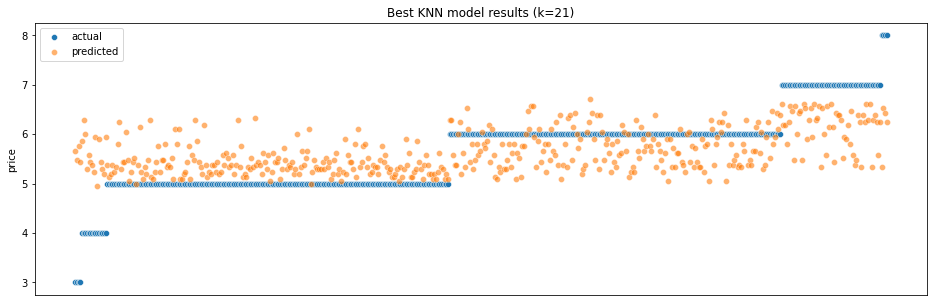

In [35]:
plt.figure(figsize=(16, 5))
sns.scatterplot(range(res.shape[0]), res['y_test'], label='actual')
sns.scatterplot(range(res.shape[0]), res['y_pred_best'], label='predicted', alpha=0.6)
plt.ylabel('price')
plt.xlabel('')
plt.title(f'Best KNN model results (k={best_k})')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()